In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_df = pd.read_csv('Movie_Id_Titles')

In [3]:
movie_df.head(5)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [5]:
movies_rating_df = pd.read_csv('u.data',sep='\t',names = ['user_id','item_id','rating','timestamp'])

In [6]:
movies_rating_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [7]:
movies_rating_df.drop('timestamp',axis=1,inplace=True)

In [8]:
movies_rating_df

,user_id,item_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3
...,...,...,...
99998,880,476,3
99999,716,204,5
100000,276,1090,1
100001,13,225,2


In [9]:
movies_rating_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [10]:
movies_rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100003 non-null  int64
 1   item_id  100003 non-null  int64
 2   rating   100003 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [11]:
movies_rating_df = pd.merge(movies_rating_df,movie_df,on = 'item_id')

In [12]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [13]:
movies_rating_df.shape

(100003, 4)

In [14]:
movies_rating_df.groupby('title').describe()

user_id                                 \
                                        count        mean         std    min   
title                                                                          
'Til There Was You (1997)                 9.0  383.777778  204.272354  152.0   
1-900 (1994)                              5.0  477.000000  244.344020  181.0   
101 Dalmatians (1996)                   109.0  450.330275  295.142779    1.0   
12 Angry Men (1957)                     125.0  453.552000  255.588677    1.0   
187 (1997)                               41.0  517.097561  241.098300    3.0   
...                                       ...         ...         ...    ...   
Young Guns II (1990)                     44.0  504.068182  254.101371   87.0   
Young Poisoner's Handbook, The (1995)    41.0  452.487805  286.352241    7.0   
Zeus and Roxanne (1997)                   6.0  532.833333  343.690219   82.0   
unknown                                   9.0  311.888889  264.160200    1.0   
Á köldum klaka (Cold Fever) (1994)        1.0  655.000000         NaN  655.0   

                                                                  item_id  \
                                         25%    50%    75%    max   count   
title                                                                       
'Til There Was You (1997)              223.0  342.0  530.0  782.0     9.0   
1-900 (1994)                           385.0  405.0  581.0  833.0     5.0   
101 Dalmatians (1996)                  183.0  435.0  699.0  938.0   109.0   
12 Angry Men (1957)                    268.0  429.0  661.0  932.0   125.0   
187 (1997)                             416.0  532.0  698.0  894.0    41.0   
...                                      ...    ...    ...    ...     ...   
Young Guns II (1990)                   301.0  459.0  732.5  943.0    44.0   
Young Poisoner's Handbook, The (1995)  246.0  473.0  634.0  936.0    41.0   
Zeus and Roxanne (1997)                251.5  627.5  796.5  881.0     6.0   
unknown                                130.0  297.0  422.0  833.0     9.0   
Á köldum klaka (Cold Fever) (1994)     655.0  655.0  655.0  655.0     1.0   

                                               ...                 rating  \
                                         mean  ...     75%     max  count   
title                                          ...                          
'Til There Was You (1997)              1300.0  ...  1300.0  1300.0    9.0   
1-900 (1994)                           1353.0  ...  1353.0  1353.0    5.0   
101 Dalmatians (1996)                   225.0  ...   225.0   225.0  109.0   
12 Angry Men (1957)                     178.0  ...   178.0   178.0  125.0   
187 (1997)                              330.0  ...   330.0   330.0   41.0   
...                                       ...  ...     ...     ...    ...   
Young Guns II (1990)                   1188.0  ...  1188.0  1188.0   44.0   
Young Poisoner's Handbook, The (1995)   547.0  ...   547.0   547.0   41.0   
Zeus and Roxanne (1997)                1164.0  ...  1164.0  1164.0    6.0   
unknown                                 267.0  ...   267.0   267.0    9.0   
Á köldum klaka (Cold Fever) (1994)     1633.0  ...  1633.0  1633.0    1.0   

                                                                           \
                                           mean       std  min   25%  50%   
title                                                                       
'Til There Was You (1997)              2.333333  1.000000  1.0  2.00  2.0   
1-900 (1994)                           2.600000  1.516575  1.0  1.00  3.0   
101 Dalmatians (1996)                  2.908257  1.076184  1.0  2.00  3.0   
12 Angry Men (1957)                    4.344000  0.719588  2.0  4.00  4.0   
187 (1997)                             3.024390  1.172344  1.0  2.00  3.0   
...                                         ...       ...  ...   ...  ...   
Young Guns II (1990)                   2.772727  1.008421  1.0  2.

In [15]:
movies_rating_df.groupby('title')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
'Til There Was You (1997),9.0,2.333333,1.000000,1.0,2.00,2.0,3.0,4.0
1-900 (1994),5.0,2.600000,1.516575,1.0,1.00,3.0,4.0,4.0
101 Dalmatians (1996),109.0,2.908257,1.076184,1.0,2.00,3.0,4.0,5.0
12 Angry Men (1957),125.0,4.344000,0.719588,2.0,4.00,4.0,5.0,5.0
187 (1997),41.0,3.024390,1.172344,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Young Guns II (1990),44.0,2.772727,1.008421,1.0,2.00,3.0,3.0,5.0
"Young Poisoner's Handbook, The (1995)",41.0,3.341463,1.237129,1.0,3.00,4.0,4.0,5.0
Zeus and Roxanne (1997),6.0,2.166667,0.983192,1.0,1.25,2.5,3.0,3.0


Now this is the dataframe that consists of movie titles and the describe method on its ratings.

In [16]:
ratings_df_mean = movies_rating_df.groupby('title')['rating'].describe()['mean']

In [17]:
ratings_df_mean

title
'Til There Was You (1997)                2.333333
1-900 (1994)                             2.600000
101 Dalmatians (1996)                    2.908257
12 Angry Men (1957)                      4.344000
187 (1997)                               3.024390
                                           ...   
Young Guns II (1990)                     2.772727
Young Poisoner's Handbook, The (1995)    3.341463
Zeus and Roxanne (1997)                  2.166667
unknown                                  3.444444
Á köldum klaka (Cold Fever) (1994)       3.000000
Name: mean, Length: 1664, dtype: float64

In [18]:
ratings_df_count = movies_rating_df.groupby('title')['rating'].describe()['count']

In [19]:
ratings_df_count

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

In [20]:
ratings_df = pd.concat([ratings_df_mean,ratings_df_count],axis=1) 

In [21]:
ratings_df

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
...,...,...
Young Guns II (1990),2.772727,44.0
"Young Poisoner's Handbook, The (1995)",3.341463,41.0
Zeus and Roxanne (1997),2.166667,6.0


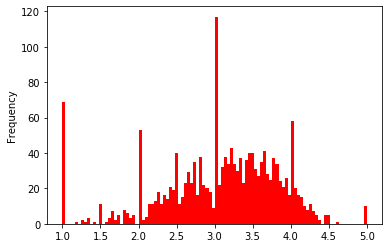

In [22]:
ratings_df['mean'].plot(bins=100,kind='hist',color='r')

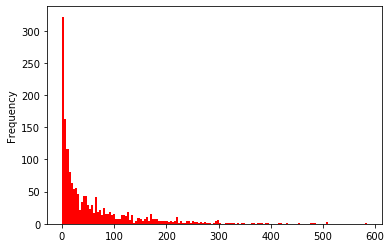

In [23]:
ratings_df['count'].plot(bins=150,kind='hist',color='r')

Through these two histogram we can conclude that highest number of movies have been rated 3 stars and on most of the movies the number of ratings lies between 0 to 100 

In [24]:
ratings_df[ratings_df['mean']==5]

,mean,count
title,,
Aiqing wansui (1994),5.0,1.0
Entertaining Angels: The Dorothy Day Story (1996),5.0,1.0
"Great Day in Harlem, A (1994)",5.0,1.0
Marlene Dietrich: Shadow and Light (1996),5.0,1.0
Prefontaine (1997),5.0,3.0
"Saint of Fort Washington, The (1993)",5.0,2.0
Santa with Muscles (1996),5.0,2.0
Someone Else's America (1995),5.0,1.0
Star Kid (1997),5.0,3.0


Movies with 5 star rating have really less number of ratings!

In [25]:
ratings_df.sort_values('count',ascending=False).head(100)

,mean,count
title,,
Star Wars (1977),4.359589,584.0
Contact (1997),3.803536,509.0
Fargo (1996),4.155512,508.0
Return of the Jedi (1983),4.007890,507.0
Liar Liar (1997),3.156701,485.0
...,...,...
Aladdin (1992),3.812785,219.0
Babe (1995),3.995434,219.0
Volcano (1997),2.808219,219.0


# Item Based Collabrative filtering on one movie Sample

In [26]:
movies_rating_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
99998,840,1674,4,Mamma Roma (1962)
99999,655,1640,3,"Eighth Day, The (1996)"
100000,655,1637,3,Girls Town (1996)
100001,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [27]:
user_id_movie_matrix = movies_rating_df.pivot_table(index = 'user_id',columns = 'title',values='rating')

In [28]:
user_id_movie_matrix.head(50)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
titanic = user_id_movie_matrix['Titanic (1997)']

In [30]:
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
      ... 
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [31]:
star_wars = user_id_movie_matrix['Star Wars (1977)']

In [32]:
star_wars

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [33]:
titanic_corr = pd.DataFrame(user_id_movie_matrix.corrwith(titanic),columns=['Correlation'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [34]:
titanic_corr = titanic_corr.join(ratings_df['count'])

In [35]:
titanic_corr

,Correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
...,...,...
Young Guns II (1990),0.317274,44.0
"Young Poisoner's Handbook, The (1995)",0.356783,41.0
Zeus and Roxanne (1997),NaN,6.0


In [40]:
titanic_corr = titanic_corr.dropna()

In [42]:
titanic_corr = titanic_corr.sort_values('Correlation',ascending=False)

In [45]:
titanic_corr.head(50)

,Correlation,count
title,,
Nadja (1994),1.000000,8.0
"Pest, The (1997)",1.000000,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.000000,3.0
For Ever Mozart (1996),1.000000,3.0
"Jerky Boys, The (1994)",1.000000,3.0
"Newton Boys, The (1998)",1.000000,4.0
Hearts and Minds (1996),1.000000,5.0
"Simple Wish, A (1997)",1.000000,3.0
Purple Noon (1960),1.000000,7.0


In [48]:
titanic_corr[titanic_corr['count']>80].sort_values('Correlation',ascending = False).head(5)

,Correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0


# These will be the top reccomendation for user who have watched titanic!